In [1]:
# SVR : Support Vector Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
# We won't be splitting the dataset into the Training set and Test set, because the dataset is small
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling - because there's a huge difference in the range of y as compared to X
# We reduce the values of X and y between -1 and +1
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
# Scaled X and Y
X = sc_X.fit_transform(X)
Y = y.reshape((len(y),1))
y = sc_y.fit_transform(Y)

In [4]:
# Inverse transforms are used to get back the original values
X = sc_X.inverse_transform(X)
y = sc_y.inverse_transform(y)

In [5]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/home/asm/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/asm/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
# Predicting a new result (If you want to know what the salary of a person with 6.5 years of experience should be)
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]]))) 
y_pred = sc_y.inverse_transform(y_pred)

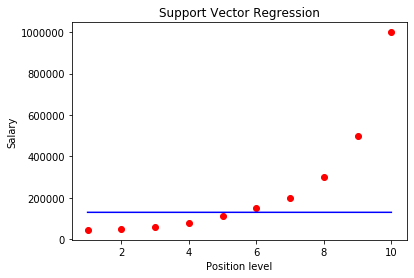

In [7]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Support Vector Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

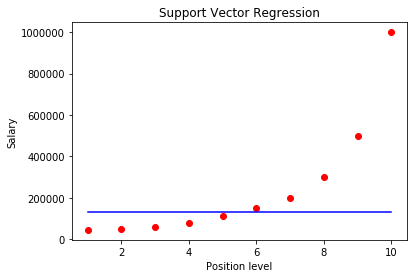

In [ ]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Support Vector Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()